## Calculating Means and Medians

I recorded the units of alcohol I drank for the last two weeks. Grab a calculator and work out the mean and median amount. What do these tell you about my drinking habits?

In [1]:
consumption_per_day = [1,0,0,3,0,9,11,0,0,2,2,0,8,6]

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame(consumption_per_day, columns = ['consumption'])

Sum of all the values

In [4]:
df.sum()

consumption    42
dtype: int64

Number of cases

In [5]:
df.count()

consumption    14
dtype: int64

The mean

In [6]:
df.mean()

consumption    3.0
dtype: float64

Order of values from lowest to highest

In [7]:
df.sort_values(by='consumption')

,consumption
1,0
2,0
4,0
7,0
8,0
11,0
0,1
9,2
10,2
3,3


Rank of values from lowest to highest

In [8]:
df.sort_values(by='consumption').reset_index()

,index,consumption
0,1,0
1,2,0
2,4,0
3,7,0
4,8,0
5,11,0
6,0,1
7,9,2
8,10,2
9,3,3


The median

In [9]:
df.sort_values(by='consumption').reset_index().median()

index          6.5
consumption    1.5
dtype: float64

So what can you say about my drinking habits?

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
xs, ys = zip(*[(index+1, row['consumption']) for index, row in df.iterrows()])

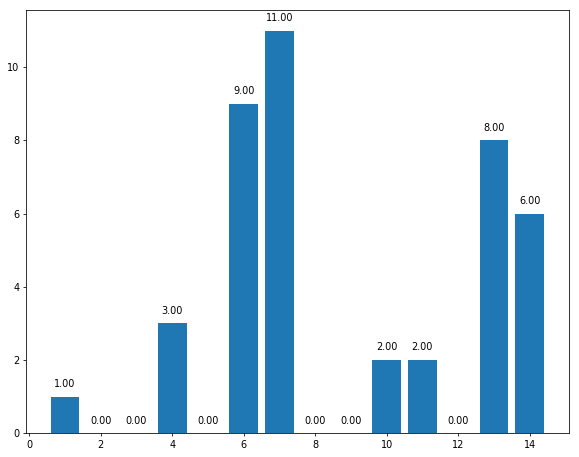

<Figure size 2880x2880 with 0 Axes>

In [12]:
width_in_inches = 10
height_in_inches = 8
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

plt.bar(xs,ys)

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.figure(figsize=(40,40))
plt.show()

Applying mean and median for the whole set is quite bad. On average, you drink around 3 per day. But, that is skewed by your weekend consumption which is around 6-11 per day. Median doesn't make sense as you're not comparing how good a certain day is versus the rest. Mode might make sense as you'd like to know how many usually you take.

Here's the mode

In [13]:
df.mode()

,consumption
0,0


yup, usually you don't drink, but when you do:

In [16]:
weekday_consumption_df = df.drop([5,6,12,13])[df['consumption'] != 0]
weekend_consumption_df = df.iloc[[5,6,12,13],:]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [17]:
print(f"During weekdays, you take around {weekday_consumption_df['consumption'].mean()} on average.")
print(f"During weekends, you take around {weekend_consumption_df['consumption'].mean()} on average.")

During weekdays, you take around 2.0 on average.
During weekends, you take around 8.5 on average.
